# Prediction of Metro Interstate Traffic Volume

## Member of The 4th Team: Ilfani, Sayyid, Zahra, and Abiyyu

### Importing The Relevant Libraries

We used, in general, Pandas, SciKit Learn, Numpy, Matplotlib, Seaborn, Math, Scipy, and Statsmodels in our program architecture.

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats

### Read .csv File

We used Metro_Interstate_Traffic_Volume.csv file. That will be used to solve the given problem: 
"The police department in Minnesota want to analyze the traffic volume between Minneapolis and St Paul. In the future, the police department want to predict the traffic volume."

In [36]:
data=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

### Changing Null Number from 'temp' Feature

We checked the data and found that there is null number in 'temp' feature. We changed the number with the previous value in consideration of similar changing temperature data.

In [37]:
index_temp=data[data['temp']==0].index
for i in index_temp:
    data['temp'][index_temp]=data['temp'][index_temp-1]
data[data['temp']==0].index

C:\Users\abiyy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Int64Index([], dtype='int64')

C:\Users\abiyy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


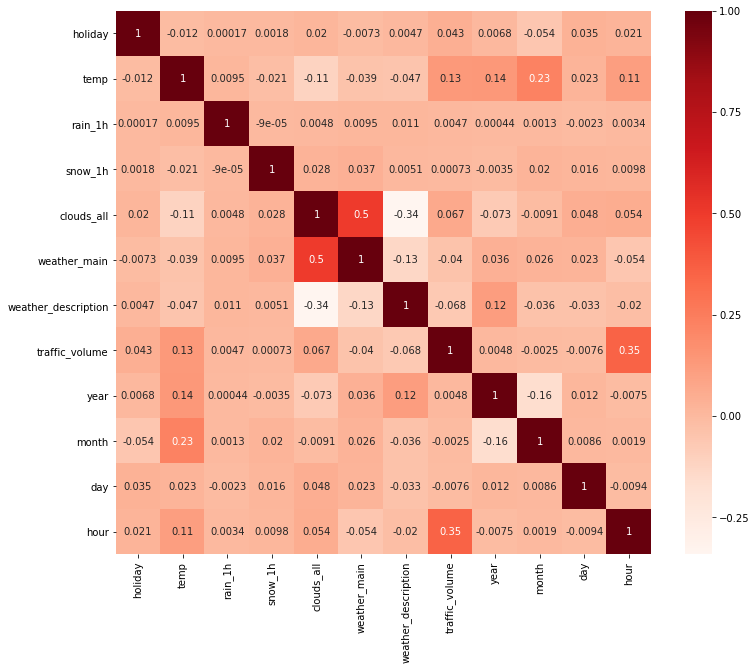

In [38]:
#categorical encoding
holiday_index=data[data['holiday']!='None'].sort_values('date_time').index
holiday_value=data[data['holiday']!='None'].sort_values('date_time')['holiday'].values

for i,name in zip(holiday_index,holiday_value):
    data['holiday'][i:i+24]=name

data['holiday'] = pd.Categorical(data['holiday']).codes
data['weather_main'] = pd.Categorical(data['weather_main']).codes
data['weather_description'] = pd.Categorical(data['weather_description']).codes
data['year'] = data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[0]))
data['month'] = data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[1]))
data['day'] = data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[2]))
data['hour'] = data['date_time'].map(lambda x: int(x.split(" ")[1].split(":")[0]))
data.drop(['date_time'], axis=1, inplace=True)

y = data['traffic_volume'].copy(deep=True)
X = data.copy(deep=True)
X.drop(['traffic_volume'], inplace=True, axis=1)
X.head()

plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [42]:
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour
0,7,288.28,0.00,0.0,40,1,24,5545,2012,10,2,9
1,7,289.36,0.00,0.0,75,1,2,4516,2012,10,2,10
2,7,289.58,0.00,0.0,90,1,19,4767,2012,10,2,11
3,7,290.13,0.00,0.0,90,1,19,5026,2012,10,2,12
4,7,291.14,0.00,0.0,75,1,2,4918,2012,10,2,13
5,7,291.72,0.00,0.0,1,0,27,5181,2012,10,2,14
6,7,293.17,0.00,0.0,1,0,27,5584,2012,10,2,15
7,7,293.86,0.00,0.0,1,0,27,6015,2012,10,2,16
8,7,294.14,0.00,0.0,20,1,4,5791,2012,10,2,17
9,7,293.10,0.00,0.0,20,1,4,4770,2012,10,2,18


### Melihat Korelasi features dengan Output

In [43]:
#Correlation with output variable
cor_target = abs(cor["traffic_volume"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target<0.02]
relevant_features

rain_1h    0.004714
snow_1h    0.000733
year       0.004753
month      0.002533
day        0.007587
Name: traffic_volume, dtype: float64

### Wow ternyata features diatas tidak berpengaruh banyak, jadi dihapus aja ya

In [44]:
X.drop(['rain_1h','snow_1h','year','month','day'], inplace=True, axis=1)
X

,holiday,temp,clouds_all,weather_main,weather_description,hour
0,7,288.28,40,1,24,9
1,7,289.36,75,1,2,10
2,7,289.58,90,1,19,11
3,7,290.13,90,1,19,12
4,7,291.14,75,1,2,13
5,7,291.72,1,0,27,14
6,7,293.17,1,0,27,15
7,7,293.86,1,0,27,16
8,7,294.14,20,1,4,17
9,7,293.10,20,1,4,18


### Scaling data, udah nyoba beberapa cara scaling, ini yang paling bagus menurut percobaan

In [11]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler().fit(X) 
X_1 = scaler.transform(X)

C:\Users\abiyy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abiyy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


### Buat features extraction, gadipake soalnya udah pake features selection dan hasilnya lebih bagus kalo gapake ini

In [12]:
pca=PCA(n_components=4)
X_r=pca.fit(X).transform(X_1)

lda=LinearDiscriminantAnalysis(n_components=4)
X_r2=lda.fit(X,y).transform(X_1)

fa=FactorAnalysis(n_components=4)
X_r3=fa.fit_transform(X_1)

### Percobaan pertama
##### Model : Regresi Linear
##### Train-Test : 60-40
##### Features Selection

[INFO] using linear model
1628.014266868487
3391130.53117235
0.14587725925157013
1841.5022484841961


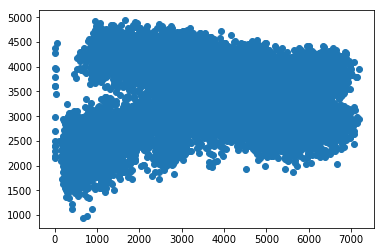

In [13]:
#Original
x_train, x_test, y_train, y_test = train_test_split(X_1,y,test_size=0.4,shuffle=True,random_state=42)
from math import sqrt
print("[INFO] using linear model")
model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan kedua
##### Model : SVR
##### Train-Test : 60-40
##### Features Selection

[INFO] using linear model
1469.4531428531936
2860893.0086652343
0.2794279798175717
1691.4174554690023


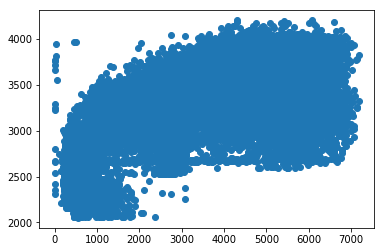

In [14]:
#Original
x_train, x_test, y_train, y_test = train_test_split(X_1,y,test_size=0.4,shuffle=True,random_state=42)
from math import sqrt
print("[INFO] using linear model")
model=SVR(kernel="rbf",gamma="auto")
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan ketiga
##### Model : SVR 
##### pake 5 Fold Cross Validation
##### Features Selection

Train Index:  [ 9641  9642  9643 ... 48201 48202 48203] 

Test Index:  [   0    1    2 ... 9638 9639 9640]


C:\Users\abiyy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [ 9641  9642  9643 ... 19279 19280 19281]


C:\Users\abiyy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [19282 19283 19284 ... 28920 28921 28922]


C:\Users\abiyy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [28923 28924 28925 ... 38561 38562 38563]


C:\Users\abiyy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index:  [    0     1     2 ... 38561 38562 38563] 

Test Index:  [38564 38565 38566 ... 48201 48202 48203]


C:\Users\abiyy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.31792718204051584, 0.3352005570557891, 0.33500152940493866, 0.33967053522437474, 0.33513388265602784]
1378.4361945851474
2574422.681887193
0.33513388265602784
1604.5007578331627


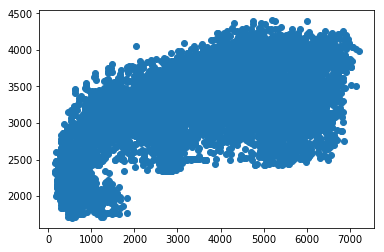

In [15]:
from math import sqrt
from sklearn.model_selection import KFold
scores = []
model = SVR(kernel='rbf')
cv = KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_1[train_index], X_1[test_index], y[train_index], y[test_index]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(scores)
y_pred=model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan Keempat
##### Model : RandomForest
##### Train-Test : 60-40
##### Features Selection

[INFO] using RandomForest model
606.4940994818706
829590.0951820081
0.7910514622539031
910.8183656371934


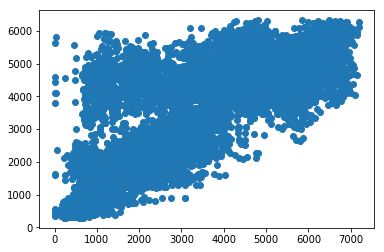

In [20]:
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(X_1,y,test_size=0.4,shuffle=True,random_state=42)
from math import sqrt
print("[INFO] using RandomForest model")
model=RandomForestRegressor(bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=9, min_samples_split=19, n_estimators=100)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan Kelima
##### Model : RandomForest
##### Pake 5 Fold Cross Validation
##### Features Selection

Train Index:  [ 9641  9642  9643 ... 48201 48202 48203] 

Test Index:  [   0    1    2 ... 9638 9639 9640]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [ 9641  9642  9643 ... 19279 19280 19281]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [19282 19283 19284 ... 28920 28921 28922]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [28923 28924 28925 ... 38561 38562 38563]
Train Index:  [    0     1     2 ... 38561 38562 38563] 

Test Index:  [38564 38565 38566 ... 48201 48202 48203]
[0.763798000844431, 0.7654804510842348, 0.7581323126472268, 0.7922286780129553, 0.7767041272961444]
617.6792933699968
864622.1313804678
0.7767041272961444
929.8505962682757


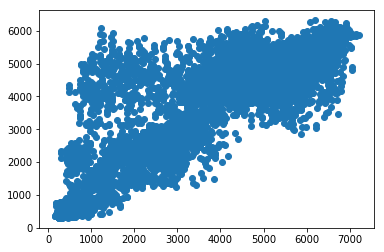

In [17]:
from math import sqrt
from sklearn.model_selection import KFold
scores = []
model = RandomForestRegressor(bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=9, min_samples_split=19, n_estimators=100)
cv = KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_1[train_index], X_1[test_index], y[train_index], y[test_index]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(scores)
y_pred=model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan Keenam
##### Model : RandomForest
##### Train-Test : 70-30
##### Features Selection

[INFO] using RandomForest model
603.5990541637336
828505.9007249796
0.7916457177901514
910.2229950539481


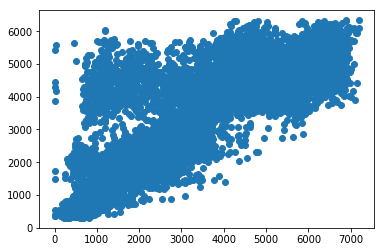

In [21]:
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(X_1,y,test_size=0.3,shuffle=True,random_state=42)
from math import sqrt
print("[INFO] using RandomForest model")
model=RandomForestRegressor(bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=9, min_samples_split=19, n_estimators=100)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan Ketujuh
##### Model : RandomForest
##### Train-Test : 75-25
##### Features Selection

[INFO] using RandomForest model
600.669941890506
826118.529635216
0.7911075566652648
908.9106279691177


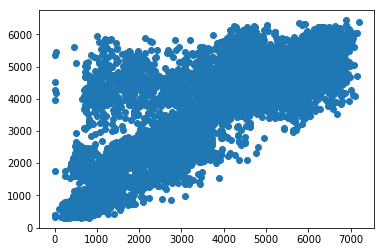

In [22]:
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(X_1,y,test_size=0.25,shuffle=True,random_state=42)
from math import sqrt
print("[INFO] using RandomForest model")
model=RandomForestRegressor(bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=9, min_samples_split=19, n_estimators=100)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan Kedelapan
##### Model : RandomForest
##### Train-Test : 80-20
##### Features Selection

[INFO] using RandomForest model
595.7368640228569
809872.7679401112
0.7951511343423173
899.9293127463463


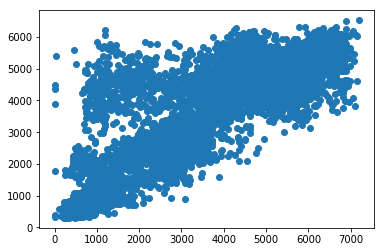

In [23]:
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(X_1,y,test_size=0.2,shuffle=True,random_state=42)
from math import sqrt
print("[INFO] using RandomForest model")
model=RandomForestRegressor(bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=9, min_samples_split=19, n_estimators=100)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan Kesembilan
##### Model : RandomForest
##### Train-Test : 85-15
##### Features Selection

[INFO] using RandomForest model
594.6392230446565
813778.9575292177
0.7937966116172668
902.0969778960673


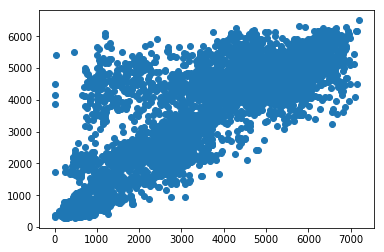

In [24]:
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(X_1,y,test_size=0.15,shuffle=True,random_state=42)
from math import sqrt
print("[INFO] using RandomForest model")
model=RandomForestRegressor(bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=9, min_samples_split=19, n_estimators=100)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan Kesepuluh
##### Model : RandomForest
##### Train-Test : 90-10
##### Features Selection

[INFO] using RandomForest model
595.9241256673401
811431.6652909416
0.795297782431306
900.795018464768


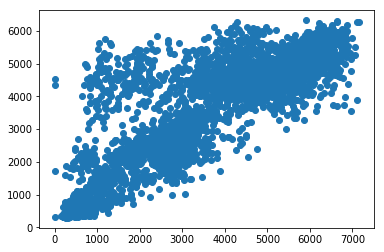

In [25]:
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(X_1,y,test_size=0.1,shuffle=True,random_state=42)
from math import sqrt
print("[INFO] using RandomForest model")
model=RandomForestRegressor(bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=9, min_samples_split=19, n_estimators=100)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan Kesebelas
##### Model : RandomForest
##### Train-Test : 83-17
##### Features Selection

[INFO] using RandomForest model
595.1178177178762
812125.6332268416
0.7948091298558828
901.1801336174925


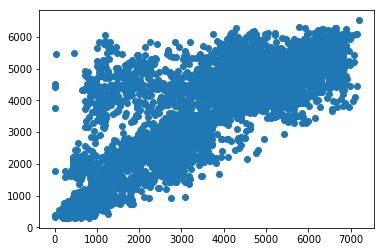

In [26]:
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(X_1,y,test_size=0.17,shuffle=True,random_state=42)
from math import sqrt
print("[INFO] using RandomForest model")
model=RandomForestRegressor(bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=9, min_samples_split=19, n_estimators=100)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan Keduabelas
##### Model : RandomForest
##### Pakai 10 Fold Cross Validation
##### Features Selection

Train Index:  [ 4821  4822  4823 ... 48201 48202 48203] 

Test Index:  [   0    1    2 ... 4818 4819 4820]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [4821 4822 4823 ... 9639 9640 9641]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [ 9642  9643  9644 ... 14460 14461 14462]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [14463 14464 14465 ... 19281 19282 19283]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [19284 19285 19286 ... 24101 24102 24103]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [24104 24105 24106 ... 28921 28922 28923]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [28924 28925 28926 ... 33741 33742 33743]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [33744 33745 33746 ... 38561 38562 38563]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [38564 38565 38566 ... 43381 43382 43

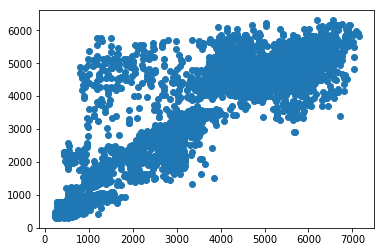

In [27]:
from math import sqrt
from sklearn.model_selection import KFold
scores = []
model = RandomForestRegressor(bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=9, min_samples_split=19, n_estimators=100)
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_1[train_index], X_1[test_index], y[train_index], y[test_index]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(scores)
y_pred=model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan Ketigabelas
##### Model : RandomForest
##### Pakai 15 Fold Cross Validation
##### Features Selection

Train Index:  [ 3214  3215  3216 ... 48201 48202 48203] 

Test Index:  [   0    1    2 ... 3211 3212 3213]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [3214 3215 3216 ... 6425 6426 6427]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [6428 6429 6430 ... 9639 9640 9641]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [ 9642  9643  9644 ... 12853 12854 12855]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [12856 12857 12858 ... 16067 16068 16069]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [16070 16071 16072 ... 19281 19282 19283]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [19284 19285 19286 ... 22495 22496 22497]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [22498 22499 22500 ... 25709 25710 25711]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [25712 25713 25714 ... 28923 28924 28925]
T

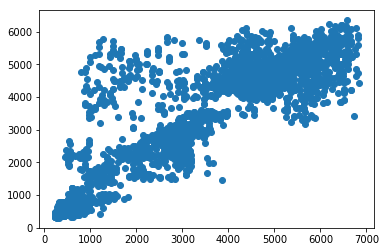

In [28]:
from math import sqrt
from sklearn.model_selection import KFold
scores = []
model = RandomForestRegressor(bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=9, min_samples_split=19, n_estimators=100)
cv = KFold(n_splits=15, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_1[train_index], X_1[test_index], y[train_index], y[test_index]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(scores)
y_pred=model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan Keempatbelas
##### Model : RandomForest
##### Pakai 20 Fold Cross Validation
##### Features Selection

Train Index:  [ 2411  2412  2413 ... 48201 48202 48203] 

Test Index:  [   0    1    2 ... 2408 2409 2410]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [2411 2412 2413 ... 4819 4820 4821]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [4822 4823 4824 ... 7230 7231 7232]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [7233 7234 7235 ... 9641 9642 9643]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [ 9644  9645  9646 ... 12051 12052 12053]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [12054 12055 12056 ... 14461 14462 14463]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [14464 14465 14466 ... 16871 16872 16873]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [16874 16875 16876 ... 19281 19282 19283]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [19284 19285 19286 ... 21691 21692 21693]
Train I

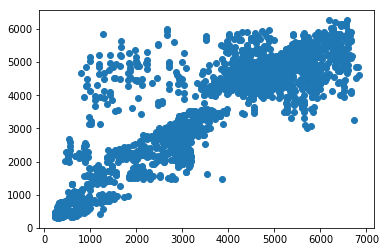

In [29]:
from math import sqrt
from sklearn.model_selection import KFold
scores = []
model = RandomForestRegressor(bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=9, min_samples_split=19, n_estimators=100)
cv = KFold(n_splits=20, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_1[train_index], X_1[test_index], y[train_index], y[test_index]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(scores)
y_pred=model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan Kelimabelas
##### Model : RandomForest
##### Pakai 25 Fold Cross Validation
##### Features Selection

Train Index:  [ 1929  1930  1931 ... 48201 48202 48203] 

Test Index:  [   0    1    2 ... 1926 1927 1928]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [1929 1930 1931 ... 3855 3856 3857]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [3858 3859 3860 ... 5784 5785 5786]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [5787 5788 5789 ... 7713 7714 7715]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [7716 7717 7718 ... 9641 9642 9643]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [ 9644  9645  9646 ... 11569 11570 11571]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [11572 11573 11574 ... 13497 13498 13499]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [13500 13501 13502 ... 15425 15426 15427]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [15428 15429 15430 ... 17353 17354 17355]
Train Index: 

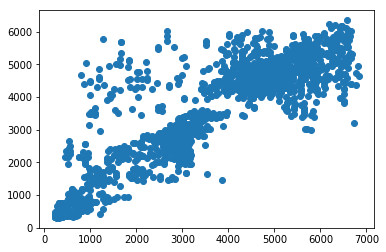

In [33]:
from math import sqrt
from sklearn.model_selection import KFold
scores = []
model = RandomForestRegressor(bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=9, min_samples_split=19, n_estimators=100)
cv = KFold(n_splits=25, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_1[train_index], X_1[test_index], y[train_index], y[test_index]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(scores)
y_pred=model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan Keenambelas
##### Model : RandomForest
##### Pakai 30 Fold Cross Validation
##### Features Selection

Train Index:  [ 1607  1608  1609 ... 48201 48202 48203] 

Test Index:  [   0    1    2 ... 1604 1605 1606]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [1607 1608 1609 ... 3211 3212 3213]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [3214 3215 3216 ... 4818 4819 4820]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [4821 4822 4823 ... 6425 6426 6427]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [6428 6429 6430 ... 8032 8033 8034]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [8035 8036 8037 ... 9639 9640 9641]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [ 9642  9643  9644 ... 11246 11247 11248]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [11249 11250 11251 ... 12853 12854 12855]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [12856 12857 12858 ... 14460 14461 14462]
Train Index:  [    

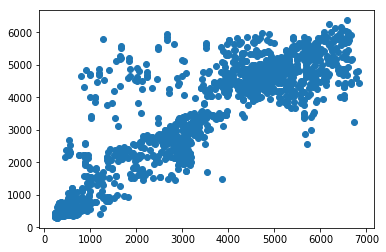

In [31]:
from math import sqrt
from sklearn.model_selection import KFold
scores = []
model = RandomForestRegressor(bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=9, min_samples_split=19, n_estimators=100)
cv = KFold(n_splits=30, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_1[train_index], X_1[test_index], y[train_index], y[test_index]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(scores)
y_pred=model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan Ketujuhbelas
##### Model : RandomForest
##### Pakai 27 Fold Cross Validation
##### Features Selection

Train Index:  [ 1786  1787  1788 ... 48201 48202 48203] 

Test Index:  [   0    1    2 ... 1783 1784 1785]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [1786 1787 1788 ... 3569 3570 3571]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [3572 3573 3574 ... 5355 5356 5357]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [5358 5359 5360 ... 7141 7142 7143]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [7144 7145 7146 ... 8927 8928 8929]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [ 8930  8931  8932 ... 10713 10714 10715]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [10716 10717 10718 ... 12499 12500 12501]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [12502 12503 12504 ... 14285 14286 14287]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [14288 14289 14290 ... 16071 16072 16073]
Train Index: 

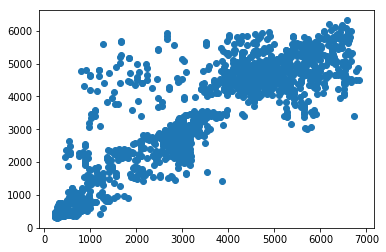

In [32]:
from math import sqrt
from sklearn.model_selection import KFold
scores = []
model = RandomForestRegressor(bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=9, min_samples_split=19, n_estimators=100)
cv = KFold(n_splits=27, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_1[train_index], X_1[test_index], y[train_index], y[test_index]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(scores)
y_pred=model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

### Percobaan Kedelapanbelas
##### Model : RandomForest
##### Pakai 25 Fold Cross Validation with Bootstrap = False
##### Features Selection

Train Index:  [ 1929  1930  1931 ... 48201 48202 48203] 

Test Index:  [   0    1    2 ... 1926 1927 1928]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [1929 1930 1931 ... 3855 3856 3857]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [3858 3859 3860 ... 5784 5785 5786]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [5787 5788 5789 ... 7713 7714 7715]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [7716 7717 7718 ... 9641 9642 9643]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [ 9644  9645  9646 ... 11569 11570 11571]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [11572 11573 11574 ... 13497 13498 13499]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [13500 13501 13502 ... 15425 15426 15427]
Train Index:  [    0     1     2 ... 48201 48202 48203] 

Test Index:  [15428 15429 15430 ... 17353 17354 17355]
Train Index: 

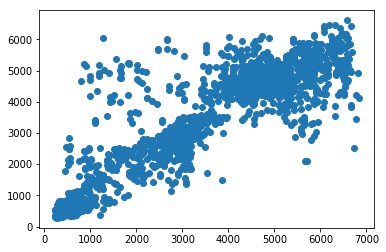

In [34]:
from math import sqrt
from sklearn.model_selection import KFold
scores = []
model = RandomForestRegressor(bootstrap=False, max_features=0.9000000000000001, min_samples_leaf=9, min_samples_split=19, n_estimators=100)
cv = KFold(n_splits=25, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_1[train_index], X_1[test_index], y[train_index], y[test_index]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(scores)
y_pred=model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) 

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

print(sqrt(mean_squared_error(y_test,y_pred)))

## Yang paling bagus percobaan ke-15 dengan R2 = 80% dan RMSE = 859.37
# --------------------------------- Sekian dan Terima Kasih -------------------------------